In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from statsmodels.tsa.statespace.sarimax import SARIMAX
from xgboost import XGBRegressor

In [2]:
df_bit=pd.read_csv("Bitcoin prices.csv")

In [3]:
df_bit

,Date,Open,High,Low,Close,Adj Close,Volume
0,Thursday 18 September 2014,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07
1,Friday 19 September 2014,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07
2,Saturday 20 September 2014,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07
3,Sunday 21 September 2014,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07
4,Monday 22 September 2014,399.100006,406.915985,397.130005,402.152008,402.152008,2.412760e+07
...,...,...,...,...,...,...,...
3120,Tuesday 4 April 2023,27795.273440,28433.742190,27681.304690,28168.089840,28168.089840,1.528454e+10
3121,Wednesday 5 April 2023,28169.726560,28739.238280,27843.763670,28177.984380,28177.984380,1.705232e+10
3122,Thursday 6 April 2023,28175.226560,28178.384770,27738.759770,28044.140630,28044.140630,1.383781e+10
3123,Friday 7 April 2023,28038.966800,28111.593750,27794.031250,27925.859380,27925.859380,1.086168e+10


In [4]:
df_bit['DateTime']=pd.to_datetime(df_bit['Date'])
df_bit

,Date,Open,High,Low,Close,Adj Close,Volume,DateTime
0,Thursday 18 September 2014,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07,2014-09-18
1,Friday 19 September 2014,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07,2014-09-19
2,Saturday 20 September 2014,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07,2014-09-20
3,Sunday 21 September 2014,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07,2014-09-21
4,Monday 22 September 2014,399.100006,406.915985,397.130005,402.152008,402.152008,2.412760e+07,2014-09-22
...,...,...,...,...,...,...,...,...
3120,Tuesday 4 April 2023,27795.273440,28433.742190,27681.304690,28168.089840,28168.089840,1.528454e+10,2023-04-04
3121,Wednesday 5 April 2023,28169.726560,28739.238280,27843.763670,28177.984380,28177.984380,1.705232e+10,2023-04-05
3122,Thursday 6 April 2023,28175.226560,28178.384770,27738.759770,28044.140630,28044.140630,1.383781e+10,2023-04-06
3123,Friday 7 April 2023,28038.966800,28111.593750,27794.031250,27925.859380,27925.859380,1.086168e+10,2023-04-07


In [5]:
df_bit['Year']=df_bit['DateTime'].apply(lambda datetime: datetime.year)
df_bit['Month']=df_bit['Date'].apply(lambda Date: Date.split()[2])
df_bit['Day']=df_bit['DateTime'].apply(lambda DateTime: DateTime.day)
df_bit['WeekDay']=df_bit['Date'].apply(lambda Date: Date.split()[0])
df_bit

,Date,Open,High,Low,Close,Adj Close,Volume,DateTime,Year,Month,Day,WeekDay
0,Thursday 18 September 2014,456.859985,456.859985,413.104004,424.440002,424.440002,3.448320e+07,2014-09-18,2014,September,18,Thursday
1,Friday 19 September 2014,424.102997,427.834991,384.532013,394.795990,394.795990,3.791970e+07,2014-09-19,2014,September,19,Friday
2,Saturday 20 September 2014,394.673004,423.295990,389.882996,408.903992,408.903992,3.686360e+07,2014-09-20,2014,September,20,Saturday
3,Sunday 21 September 2014,408.084991,412.425995,393.181000,398.821014,398.821014,2.658010e+07,2014-09-21,2014,September,21,Sunday
4,Monday 22 September 2014,399.100006,406.915985,397.130005,402.152008,402.152008,2.412760e+07,2014-09-22,2014,September,22,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
3120,Tuesday 4 April 2023,27795.273440,28433.742190,27681.304690,28168.089840,28168.089840,1.528454e+10,2023-04-04,2023,April,4,Tuesday
3121,Wednesday 5 April 2023,28169.726560,28739.238280,27843.763670,28177.984380,28177.984380,1.705232e+10,2023-04-05,2023,April,5,Wednesday
3122,Thursday 6 April 2023,28175.226560,28178.384770,27738.759770,28044.140630,28044.140630,1.383781e+10,2023-04-06,2023,April,6,Thursday
3123,Friday 7 April 2023,28038.966800,28111.593750,27794.031250,27925.859380,27925.859380,1.086168e+10,2023-04-07,2023,April,7,Friday


In [6]:
#Linear Regression
X8 = df_bit.drop(['Date','DateTime','WeekDay','Month',"High"], axis=1)
y8 = df_bit['High']
X8_train, X8_test, y8_train, y8_test = train_test_split(X8, y8, test_size=0.3)
model = LinearRegression()
model.fit(X8_train, y8_train)
y8_pred = model.predict(X8_test)
r2_score = r2_score(y8_test, y8_pred)
print("score:", r2_score)

score: 0.9996675326391647


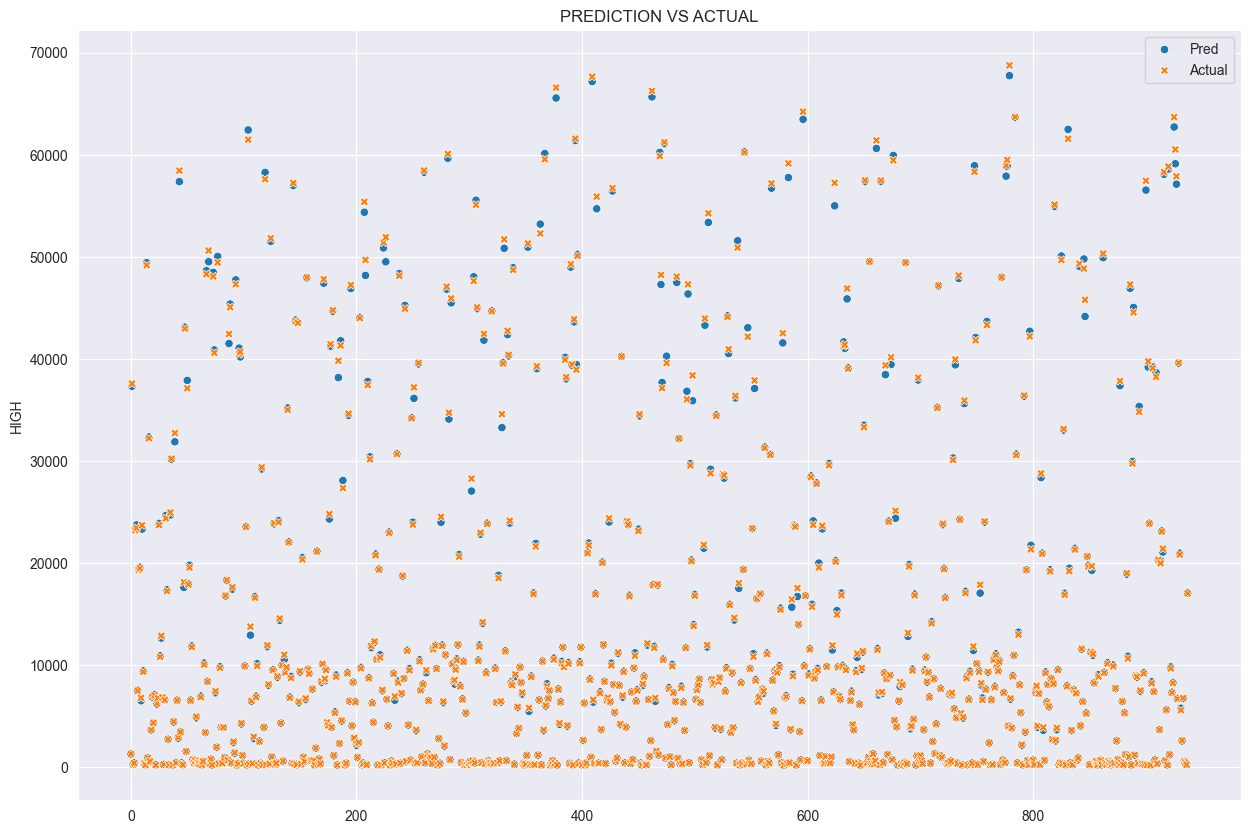

In [7]:
df= pd.DataFrame(data = [y8_pred, y8_test]).T
df.columns = ['Pred', 'Actual']
plt.figure(figsize=(15,10))
sns.scatterplot(df)
plt.title("PREDICTION VS ACTUAL")
plt.ylabel("HIGH")
plt.show()

In [8]:
df

,Pred,Actual
0,1313.096929,1319.699951
1,37338.948483,37599.960940
2,327.491625,297.773987
3,459.353870,429.769012
4,23415.487178,23237.078130
...,...,...
933,6751.673558,6794.330078
934,593.525184,599.984009
935,450.847515,454.640015
936,289.626533,262.196014


In [9]:
X6 = df_bit.drop(['Date','DateTime','Month','WeekDay','Open','High','Volume','Low','Adj Close',"Year",'Day'], axis=1)
y6 = df_bit['Open']

X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.3)
rfr = RandomForestRegressor(oob_score=True)
rfr.fit(X6_train, y6_train)
y6_pred = rfr.predict(X6_test)
M = np.mean(y6_test) + np.mean(y6_pred)
mse = mean_squared_error(y6_test, y6_pred)
print("Mean:", M)
print("Mean squared error:", mse)
print(RandomForestRegressor._get_oob_predictions)


Mean: 25709.70131536367
Mean squared error: 893886.8921330206
<function ForestRegressor._get_oob_predictions at 0x0000017AF29BF560>


In [10]:
df6= pd.DataFrame(data = [y6_pred, y6_test]).T
df6.columns = ['Pred', 'Actual']
df6

,Pred,Actual
0,10803.794910,10676.529300
1,21842.803654,21870.902340
2,616.567384,614.635010
3,38784.596172,38285.281250
4,58757.334767,61221.132810
...,...,...
933,704.926508,689.124023
934,275.599060,266.496002
935,33201.301875,32129.408200
936,6356.062129,6739.209961


In [11]:
#KNN-R
X3 = df_bit.drop(['Date', 'DateTime', 'Month', 'WeekDay', "Low",],axis=1)
y3 = df_bit['Low']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3)
knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
knn.fit(X3_train, y3_train)
y3_pred = knn.predict(X3_test)
mse = mean_squared_error(y3_test, y3_pred)
print("Mean squared error:", mse)

Mean squared error: 139472058.3639951


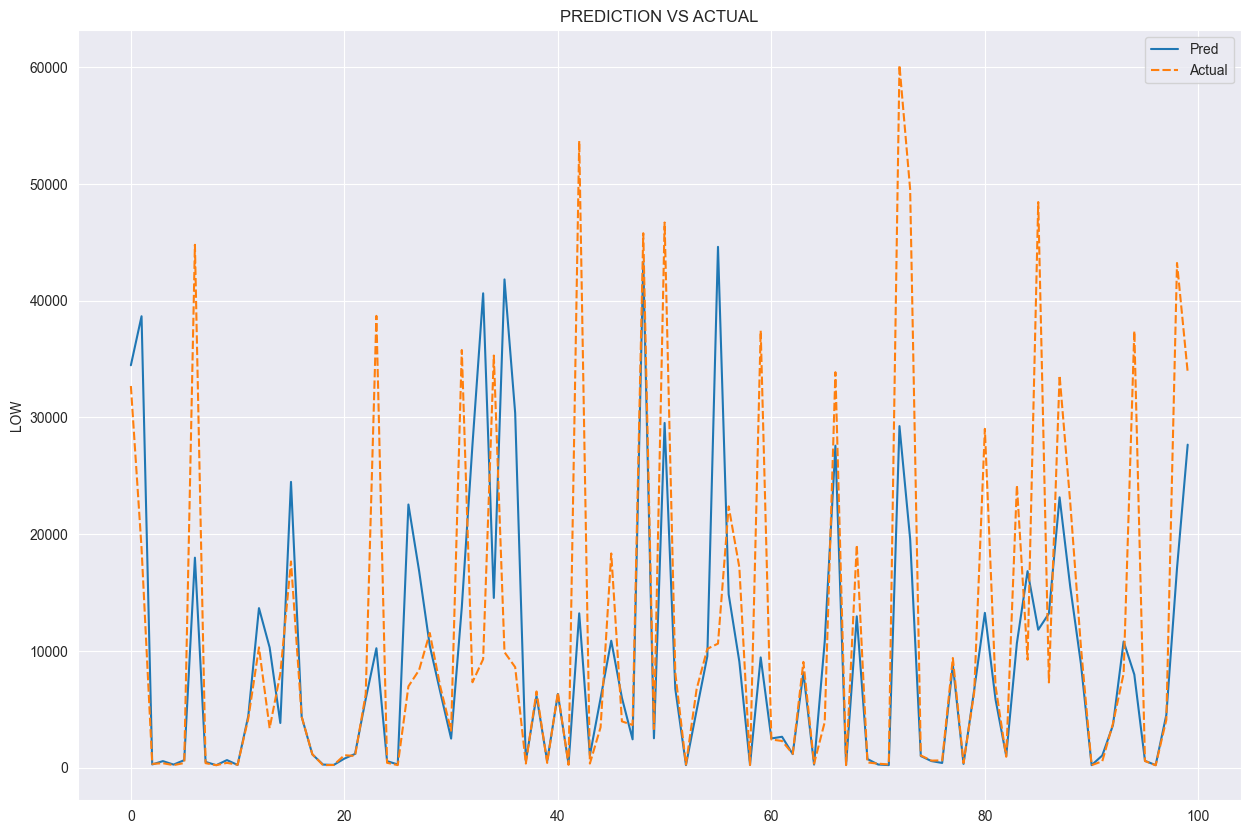

In [12]:
df3 = pd.DataFrame(data=[y3_pred, y3_test]).T
df3.columns = ['Pred', 'Actual']
plt.figure(figsize=(15, 10))
sns.lineplot(df3.head(100))
plt.title("PREDICTION VS ACTUAL")
plt.ylabel("LOW")
plt.show()

In [13]:
df3

,Pred,Actual
0,34472.614448,32697.308590
1,38670.437232,18813.455080
2,286.281502,335.071991
3,571.530287,392.932007
4,276.193192,229.022003
...,...,...
933,36606.715033,19310.962890
934,26608.385105,6696.484863
935,877.574345,1164.959961
936,272.209654,455.459015


In [14]:

X5 = df_bit.drop(['Date', 'Month', 'WeekDay', 'Day', 'Year', 'DateTime', 'Volume'], axis=1) # Features
y5 = df_bit['Volume']

# Split the data into training and testing sets
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.3)

# Scale features
scaler = StandardScaler()
X5_train = scaler.fit_transform(X5_train)
X5_test = scaler.transform(X5_test)

# Initialize and train the SVR model
svr = SVR(kernel='linear', C=1.0)
svr.fit(X5_train, y5_train)

# Make predictions on the test set
y5_pred = svr.predict(X5_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y5_test, y5_pred)
print('Mean squared error:', mse)
df5 = pd.DataFrame(data=[y5_pred, y5_test])
df5

Mean squared error: 5.544596055228967e+20


,0,1,2,3,4,5,6,7,8,9,...,928,929,930,931,932,933,934,935,936,937
0,8.350355e+09,8.350355e+09,8.350360e+09,8.350355e+09,8.350357e+09,8.350364e+09,8.350366e+09,8.350355e+09,8.350359e+09,8.350355e+09,...,8.350358e+09,8.350356e+09,8.350365e+09,8.350376e+09,8.350355e+09,8.350370e+09,8.350359e+09,8.350378e+09,8.350367e+09,8.350355e+09
1,5.984930e+07,3.180800e+07,2.441125e+10,5.655240e+07,2.791610e+09,4.846953e+10,1.962543e+10,4.679830e+07,3.093410e+10,3.243130e+07,...,2.299162e+10,5.313624e+09,7.137861e+10,3.048450e+10,2.190540e+07,2.297187e+10,7.287690e+09,3.587390e+10,2.243535e+10,9.763870e+07


In [15]:
df5 = pd.DataFrame(data=[y5_pred, y5_test]).T
df5.columns = ['Pred', 'Actual']

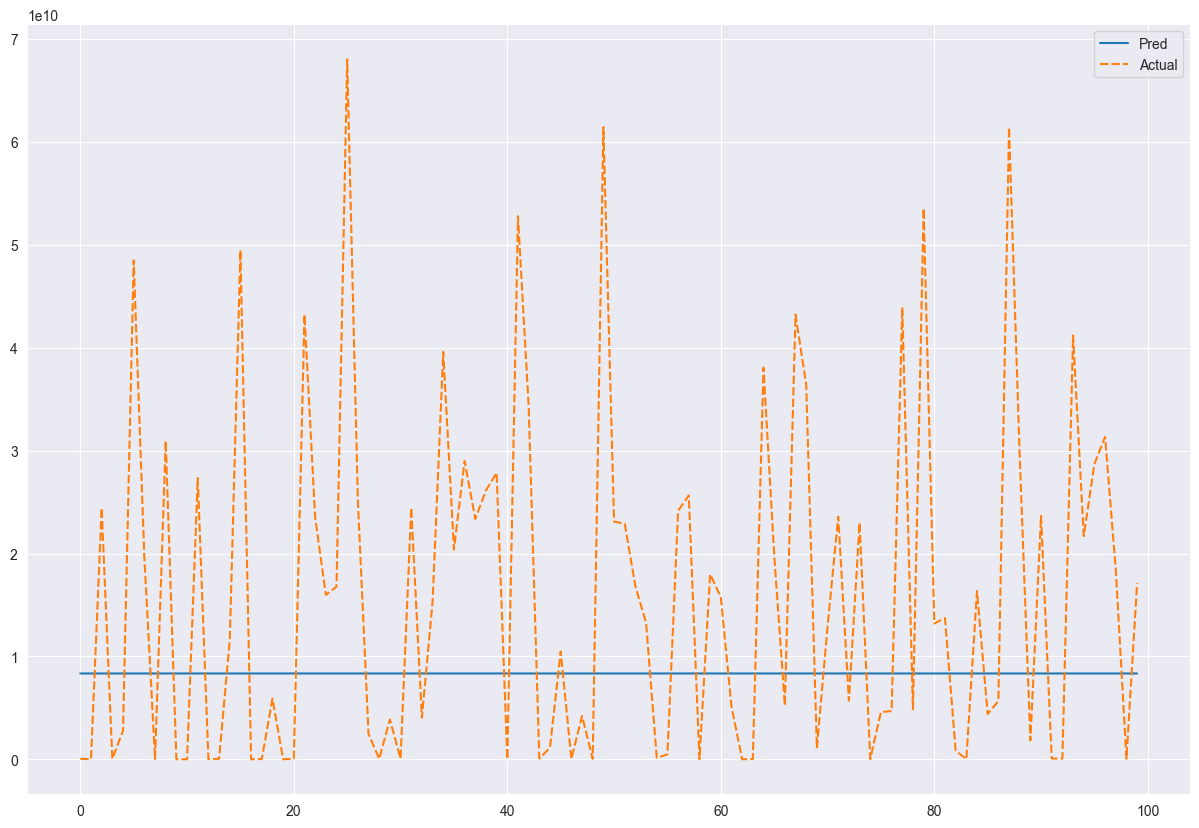

In [16]:
plt.figure(figsize=(15,10))
sns.lineplot(df5.head(100))
plt.show()

In [17]:
df_bit['Open'] = pd.cut(df_bit['Open'], bins=5, labels=False)

In [18]:
df_bit['Low'] = pd.cut(df_bit['Low'], bins=5, labels=False)

In [19]:
X4 = df_bit.drop(['Date','DateTime','Month','WeekDay','Volume','Adj Close',"Year",'Day','Low'],axis=1)
y4 = df_bit['Low']
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)
nb = GaussianNB()
nb.fit(X4_train, y4_train)
y4_pred = nb.predict(X4_test)
print('Accuracy:', accuracy_score(y4_test, y4_pred))
print('Confusion Matrix:\n', confusion_matrix(y4_test, y4_pred))
print('Classification Report:\n', classification_report(y4_test, y4_pred))

Accuracy: 0.9936
Confusion Matrix:
 [[456   1   0   0   0]
 [  0  73   0   0   0]
 [  0   0  41   1   0]
 [  0   0   0  37   0]
 [  0   0   0   2  14]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       457
           1       0.99      1.00      0.99        73
           2       1.00      0.98      0.99        42
           3       0.93      1.00      0.96        37
           4       1.00      0.88      0.93        16

    accuracy                           0.99       625
   macro avg       0.98      0.97      0.97       625
weighted avg       0.99      0.99      0.99       625


C:\Users\vansh\AppData\Local\Temp\ipykernel_936\372131060.py:4: UserWarning: 
The markers list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.
  chart=sns.scatterplot(df4.head(100),markers='d')


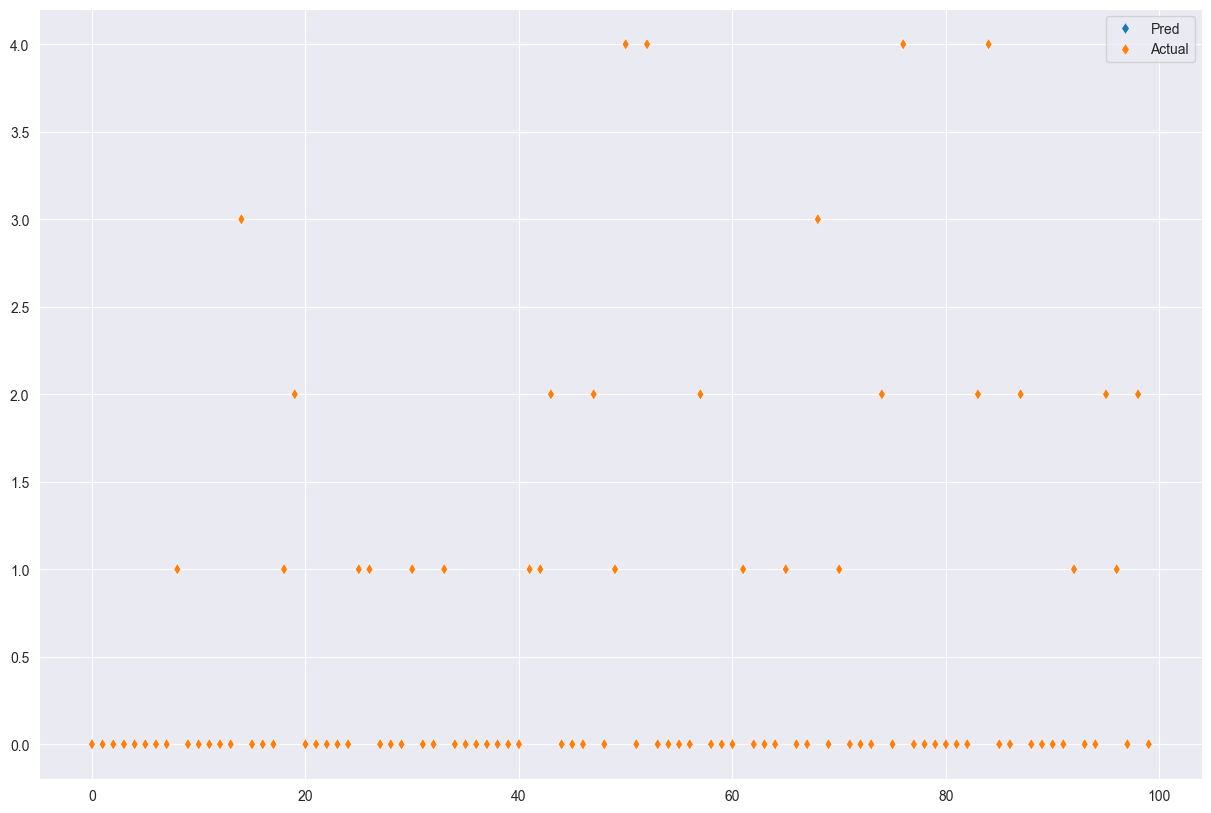

In [20]:
df4 = pd.DataFrame(data=[y4_pred, y4_test]).T
df4.columns = ['Pred', 'Actual']
plt.figure(figsize=(15,10))
chart=sns.scatterplot(df4.head(100),markers='d')
plt.show()

In [21]:

X1 = df_bit.drop(['Date','DateTime','Month','WeekDay','Open','High','Volume','Low','Adj Close',"Year",'Day'], axis=1)
y1 = df_bit['Open']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3)
rfc = RandomForestClassifier()
rfc.fit(X1_train, y1_train)
y1_pred = rfc.predict(X1_test)

accuracy = accuracy_score(y1_test, y1_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9722814498933902


In [22]:
df1= pd.DataFrame(data = [y1_pred, y1_test]).T
df1.columns = ['Pred', 'Actual']
df1

,Pred,Actual
0,0,0
1,1,1
2,3,3
3,0,0
4,0,0
...,...,...
933,4,4
934,3,3
935,0,0
936,1,1


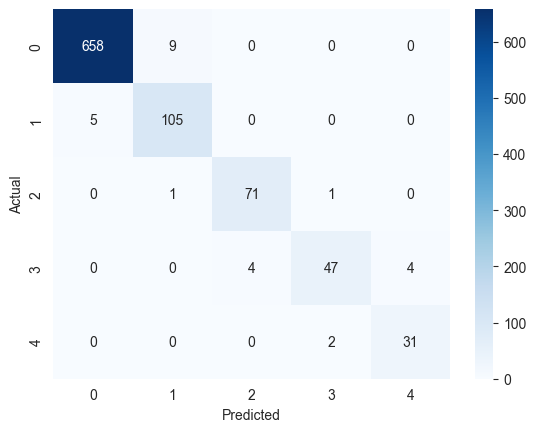

In [23]:
cm = confusion_matrix(y1_test, y1_pred)
labels = np.unique(y1)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [24]:
df_bit['Close'] = pd.cut(df_bit['Close'], bins=5, labels=False)

X2 = df_bit.drop(['Date','DateTime','Month','WeekDay','High','Volume','Adj Close',"Year",'Day','Close'],axis=1)
y2 = df_bit['Close']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3)
dtc = DecisionTreeClassifier()
dtc.fit(X2_train, y2_train)
y2_pred = dtc.predict(X2_test)
dtc.score(X2_test, y2_test)


0.9840085287846482

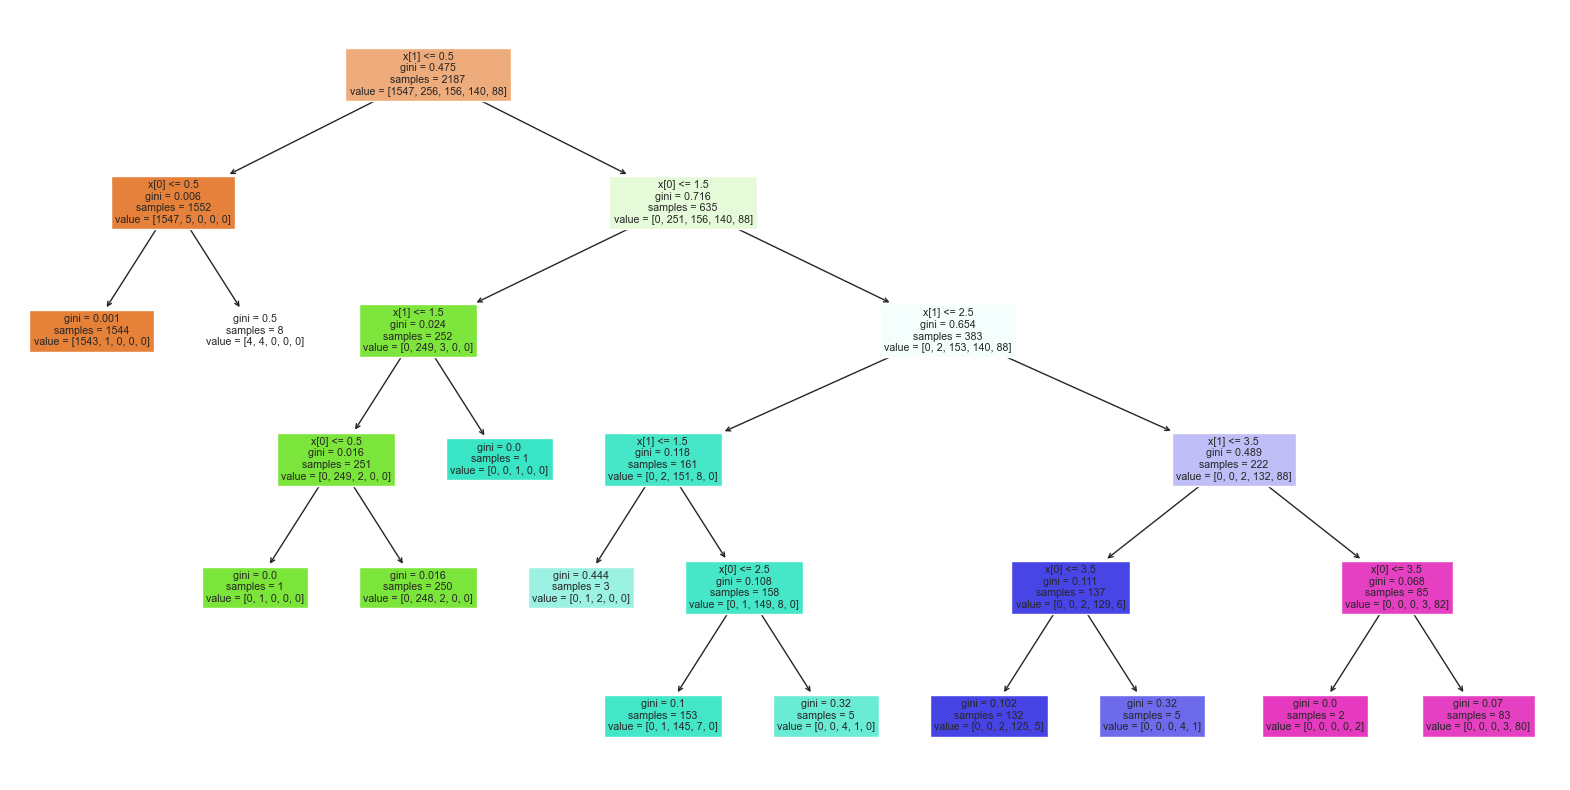

In [25]:
plt.figure(figsize=(20,10))
plot_tree(dtc, filled=True)
plt.show()

In [26]:
df2= pd.DataFrame(data = [y2_pred, y2_test]).T
df2.columns = ['Pred', 'Actual']
df2

,Pred,Actual
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
933,0,0
934,0,0
935,0,0
936,0,0


In [27]:
#As we can see many models are under-fitting and over-fitiing which indicates that they are not the optimal method to make predictions for our continuous dataset.